**Домашнее задание «Случайные марковские процессы»**

Скачайте текст произведения «Война и мир»: ссылка на GitHub и Google Drive.
Очистите его, оставив только русские буквы и символы пробела.

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [ ]:
!pip install hmmlearn

In [ ]:
from hmmlearn import hmm

In [ ]:
filenames = ['tom_1.txt', 'tom_2.txt', 'tom_3.txt', 'tom_4.txt']

with open('/content/w&p', 'w') as outfile:
  for fname in filenames:
    with open(fname) as infile:
      for line in infile:
        outfile.write(line)

In [ ]:
with open('/content/w&p', 'r') as f:
  text = f.read().lower()

text[:1000]

'annotation\n\n\nлев толстой\n\nвойна и мир\n\nтом 2\n\n\n\n\n\n* * *\n\n\n\nтом iiчасть перваяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nхi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\n\n\n\n\nчасть втораяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\n\n\n\n\nчасть третьяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\nxxii\n\nxxiii\n\nxxiv\n\nxxv\n\nxxvi\n\n\n\n\n\nчасть четвертаяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\n\n\n\n\nчасть пятаяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\nxxii\n\n\n\n\n\nпримечание издателяпечатные варианты\n\n\n\n\n\n* * *\n\n\n\n\n\nтом ii\n\n\nлев николаевич толстой\n\nвойна и мир\n\nтом 2\n\n\n\n\nчасть первая\n\n\n\n\ni\n\n\n\n\n

In [ ]:
len(text)

4551190

In [ ]:
with open('/content/tom_1.txt', 'r') as f:

  text_1 = f.read().lower()

text_1[:1000]

'annotation\n\n\nлев толстой\n\nвойна и мир\n\nтом 2\n\n\n\n\n\n* * *\n\n\n\nтом iiчасть перваяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nхi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\n\n\n\n\nчасть втораяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\n\n\n\n\nчасть третьяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\nxxii\n\nxxiii\n\nxxiv\n\nxxv\n\nxxvi\n\n\n\n\n\nчасть четвертаяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\n\n\n\n\nчасть пятаяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\nxxii\n\n\n\n\n\nпримечание издателяпечатные варианты\n\n\n\n\n\n* * *\n\n\n\n\n\nтом ii\n\n\nлев николаевич толстой\n\nвойна и мир\n\nтом 2\n\n\n\n\nчасть первая\n\n\n\n\ni\n\n\n\n\n

In [ ]:
len(text_1)

2275595

In [ ]:
#почему в 1 томе лежит том 2? Не понятно, ну да ладно.

In [ ]:
text = re.sub('\s+',' ', text)
text = re.sub('[^а-яё ]','', text)
text = re.sub('\s+',' ', text)
text[:1000]

' лев толстой война и мир том том часть первая х часть вторая часть третья часть четвертая часть пятая примечание издателяпечатные варианты том лев николаевич толстой война и мир том часть первая в начале года николай ростов вернулся в отпуск денисов ехал тоже домой в воронеж и ростов уговорил его ехать с собой до москвы и остановиться у них в доме на предпоследней станции встретив товарища денисов выпил с ним три бутылки вина и подъезжая к москве несмотря на ухабы дороги не просыпался лежа на дне перекладных саней подле ростова который по мере приближения к москве приходил все более и более в нетерпение скоро ли скоро ли о эти несносные улицы лавки калачи фонари извозчики думал ростов когда уже они записали свои отпуски на заставе и въехали в москву денисов приехали спит говорил он всем телом подаваясь вперед как будто он этим положением надеялся ускорить движение саней денисов не откликался вот он уголперекресток где захар извозчик стоит вот он и захар и всё та же лошадь вот и лавочк

Постройте матрицу переходных вероятностей.

In [ ]:
a = ord('а')
RUSSIAN = ''.join([chr(i) for i in range(a,a+6)] + [chr(a+33)] + [chr(i) for i in range(a+6, a+32)])
RUSSIAN = RUSSIAN + ' ' # добавим пробел
RUSSIAN

'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '

In [ ]:
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [ ]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [ ]:
for cp, cn in zip(text[:-1], text[1:]):
  probabilities[POS[cp], POS[cn]] += 1

In [ ]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [ ]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

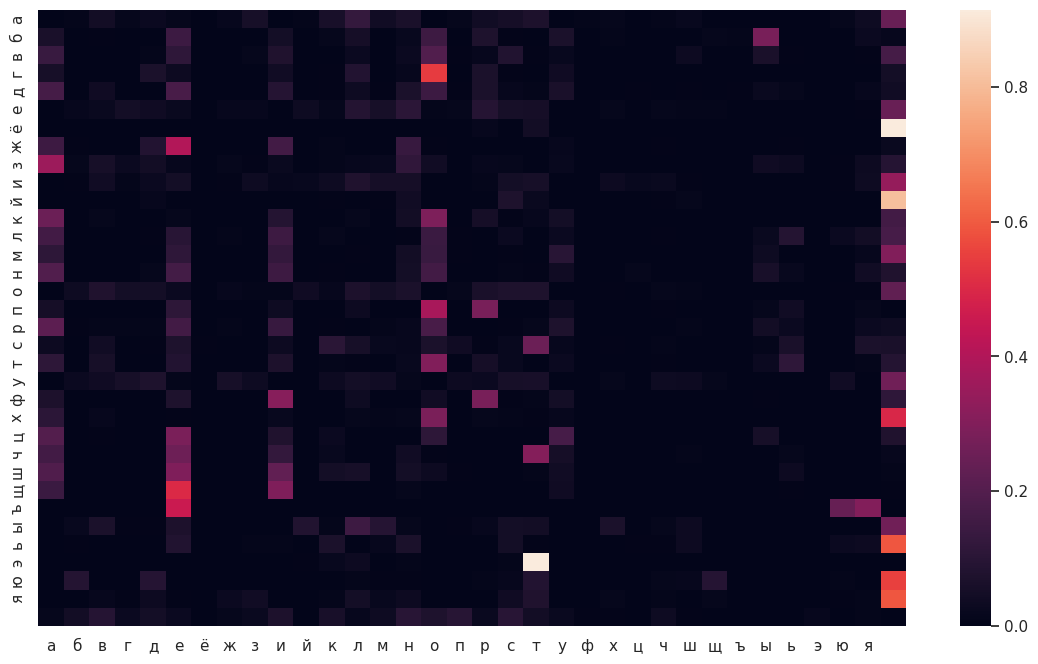

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [ ]:
start = POS['п']
end = POS['р']
prior = 1./len(POS)
i=0
j=0
combinations={}

for l1 in POS.keys():
  for l2 in POS.keys():
    proba = prior * probabilities[start, POS[l1]] \
    * probabilities[POS[l1], POS[l2]] \
    * probabilities[POS[l2], end]
    j+=1
    if proba > 0:
      combinations.setdefault(''.join(['п', l1, l2, 'р']), proba)
      i+=1

data = {'combination':combinations.keys(),
        'probability':combinations.values()}
comb_df = pd.DataFrame(data)
comb_df.head(10)

,combination,probability
0,паар,5.403265e-09
1,пабр,9.402131e-07
2,павр,1.199556e-06
3,пагр,1.162634e-06
4,падр,2.689274e-06
5,паер,1.939989e-06
6,пажр,9.289334e-09
7,пазр,1.314910e-06
8,паир,1.996117e-08
9,пайр,5.330374e-09


Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [ ]:
w = []
start = 'б'
w.append(start)
for i in range(7):
  index = POS[w[i]]
  next_char = np.random.choice(list(POS.keys()), p=probabilities[index])
  w.append(next_char)

print (''.join(w))

быеатско


Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. \
Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [ ]:
series = pd.read_csv('mean-monthly-air-temperature-deg.csv')['Deg'].dropna()

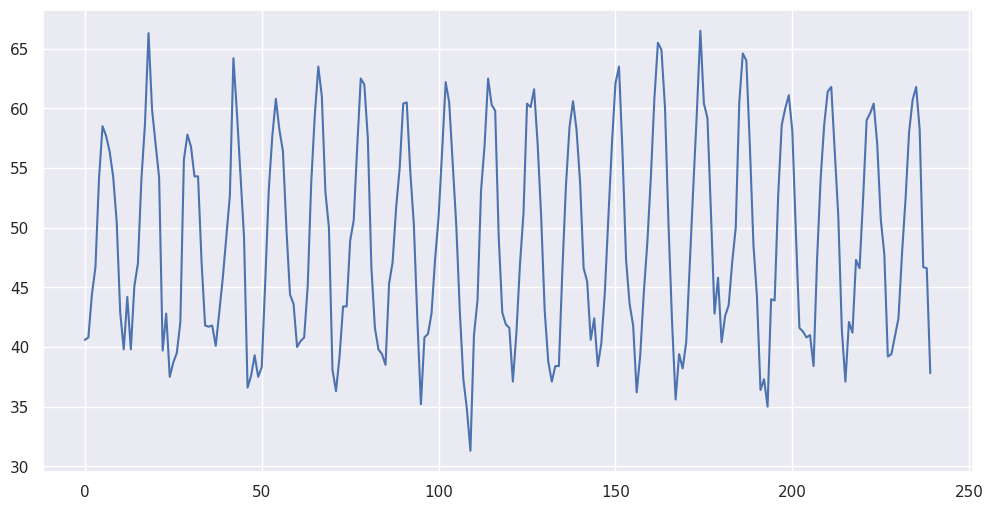

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(series)

In [ ]:
values = series.values.reshape(-1,1)
values

array([[40.6],
       [40.8],
       [44.4],
       [46.7],
       [54.1],
       [58.5],
       [57.7],
       [56.4],
       [54.3],
       [50.5],
       [42.9],
       [39.8],
       [44.2],
       [39.8],
       [45.1],
       [47. ],
       [54.1],
       [58.7],
       [66.3],
       [59.9],
       [57. ],
       [54.2],
       [39.7],
       [42.8],
       [37.5],
       [38.7],
       [39.5],
       [42.1],
       [55.7],
       [57.8],
       [56.8],
       [54.3],
       [54.3],
       [47.1],
       [41.8],
       [41.7],
       [41.8],
       [40.1],
       [42.9],
       [45.8],
       [49.2],
       [52.7],
       [64.2],
       [59.6],
       [54.4],
       [49.2],
       [36.6],
       [37.6],
       [39.3],
       [37.5],
       [38.3],
       [45.5],
       [53.2],
       [57.7],
       [60.8],
       [58.2],
       [56.4],
       [49.8],
       [44.4],
       [43.6],
       [40. ],
       [40.5],
       [40.8],
       [45.1],
       [53.8],
       [59.4],
       [63

In [ ]:
best_model = []

for n in range(3, 14):
  model = hmm.GaussianHMM(n_components=n, covariance_type='full', n_iter=500)
  model.fit(values)
  best_model.append(model.score(values))
  n_opt = np.argmax(best_model)+3

print(f'оптимальное количество n_components = {n_opt}')

оптимальное количество n_components=10


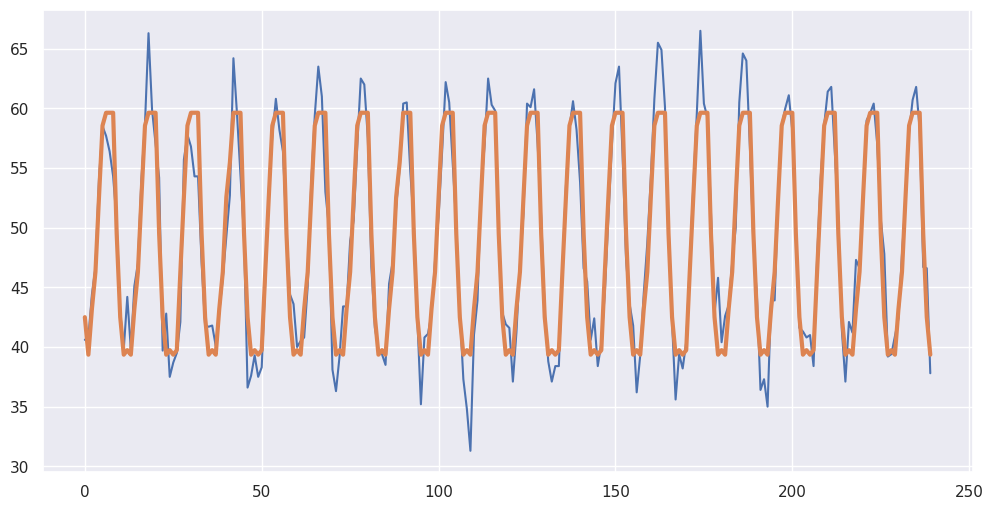

In [ ]:
model = hmm.GaussianHMM(n_components=n_opt,
                        covariance_type='full',
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
  means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)